# Classificação Linear MANUAL

Aqui demonstro como funciona uma classificação através de uma reta linear. Utilizo um dataset do banco de dados do PyTorch e a partir disso criamos uma reta que divide os dados. Por fim, avaliamos a classificação de um ponto genérico de input e vemos a classificação deste. 

In [43]:
import torch

In [44]:
import numpy as np

In [45]:
import matplotlib.pyplot as plt

In [25]:
from sklearn.datasets import make_classification

A equação da reta da reta é uma equação <b><i> ax + by + c = 0</b></i> e em Redes Neurais utilizaremos os pesos e bias que serão <b><i> w1*x1 + w2*x2 + b = 0 </b></i>

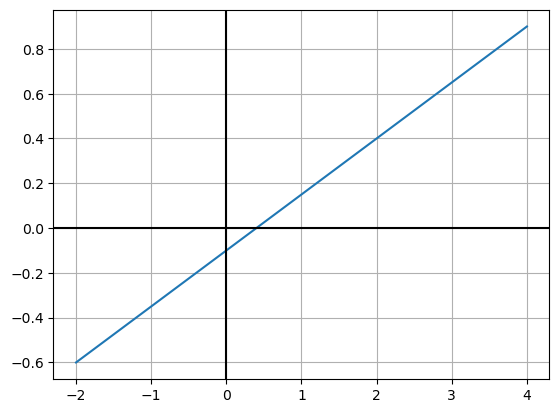

In [51]:
# coeficientes da reta
a = -1 
b = 4
c = 0.4

#funcao para plotar essa reta
def plotline(a,b,c):
    x = np.linspace(-2,4,50)
    y = -(a/b)*x -c/b
    plt.plot(x,y)
    plt.grid(True)
    plt.axvline(0,-1,1,color='k')
    plt.axhline(0,-2,4,color='k')

plotline(a,b,c)

In [52]:
np.random.seed(46) #seed randomica

# importando o dataset
X, Y = make_classification(n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1)

#X é um tensor com duas colunas que contêm os pesos 

O valor de classificação desse ponto é 0


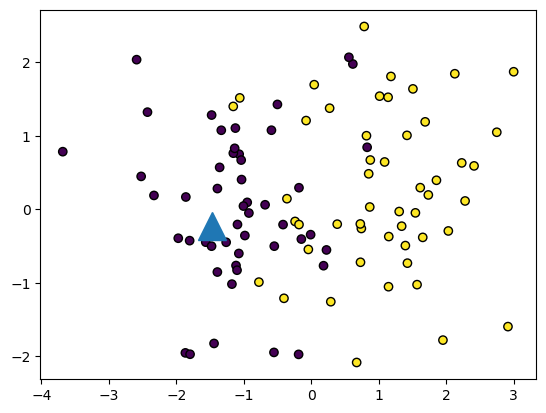

In [53]:
# plotando o gráfico do dataset
plt.scatter(X[:,0],X[:,1],marker='o',c=Y,edgecolor='k')

#escolhendo um ponto do dataset para avaliação
p=X[10]
print('O valor de classificação desse ponto é {}'.format(Y[10]))

#inserindo esse ponto no gráfico
plt.plot(p[0],p[1],marker='^',markersize=20)

In [54]:
# funcao que plot o grafico do modelo dados os pesos w1 e w2, bem como o viés
def plotmodel(w1,w2,b):
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolor='k')

    x = np.linspace(-2, 4, 50)
    y = (-w1*x -b)/w2

    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()
    
    #plotando eixos coordenados
    plt.axvline(0, -1, 1, color='k', linewidth=1)
    plt.axhline(0, -2, 4, color='k', linewidth=1)
    plt.plot(x, y, label='_nolegend_')

    #limitando o espaço 2D
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

O valor retornado pela função linear é -4.4


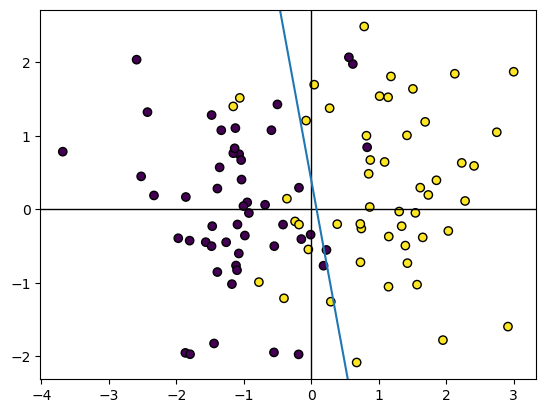

In [55]:
# inserindo uma reta linear inicial para dividir "bem" os dados
w1 = 5 #a
w2 = 1  #b
b  = -0.4  #c
plotmodel(w1, w2, b)

# ponto qualquer no plano X1 X2
p = (-1, 1)
reta = w1 * p[0] + w2 * p[1] + b
print('O valor retornado pela função linear é {}'.format(reta))

Nesse classificador simples, vemos que as bolinhas azuis são para classificar valores negativos (0) e os valores amarelos, acima da reta são classificados como positivos (1). 

A classe desse ponto é 1 e a cor é yellow


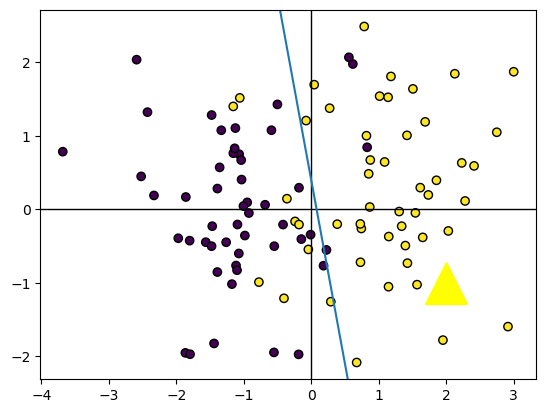

In [61]:
# criando uma função para classificar um ponto recebido de acordo com o nosso classificador feito
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b
  
  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

# testando esse classificador
p = (2, -1)
classe, cor = classify(p, w1, w2, b)
print('A classe desse ponto é {} e a cor é {}'.format(classe, cor))

#plotando esse ponto no grafico, junto com o dataset
plotmodel(w1,w2, b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

In [62]:
#calculo da acuracia do classificador
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b) #so queremos saber qual a categoria
  if categ == Y[k]:
    acertos += 1
    
print("Acurácia: {0}%".format(100*acertos/len(X)))

Acurácia: 87.0%


# Camada LINEAR  ➞ Perceptron

Aqui implemento um perceptron básico para avaliarmos e compararmos sua implementação com a equação da reta definida anteriormente. 

In [63]:
import torch
from torch import nn #neural networks

In [64]:
torch.manual_seed(42) #seed randomica para ter sempre o mesmo resultado

#iniciando o perceptron
perceptron = nn.Linear(in_features=3,out_features=1)

#o perceptron inicia os pesos w1,...,wn e o bias(b) de forma aleatória
#verificando quais os pesos e bias iniciados

print(perceptron.weight.data[0])
print(perceptron.bias.data)

tensor([ 0.4414,  0.4792, -0.1353])
tensor([0.5304])


In [68]:
#forçando os pesos e bias serem iguais a nossa equação da reta determinada anteriormente
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()
print(perceptron.weight.data[0])
print(perceptron.bias.data)

tensor([ 0.4414,  0.4792, -0.1353])
tensor([0.5304])


C:\Users\jesap\AppData\Local\Temp\ipykernel_5428\2579813026.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


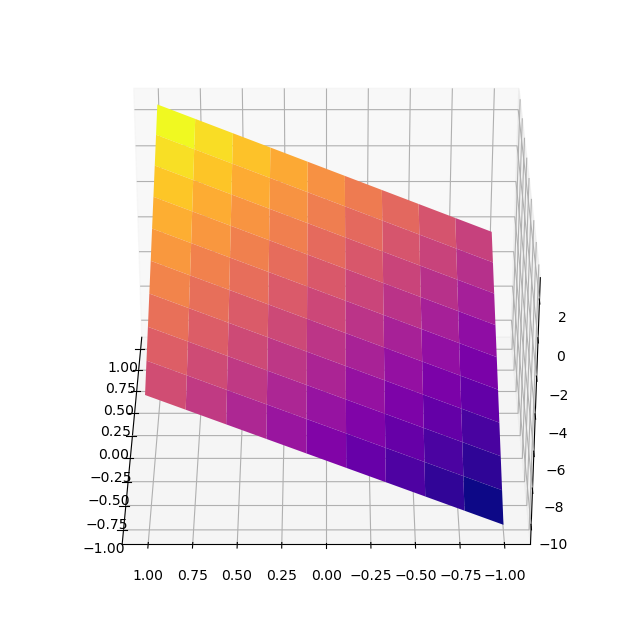

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
  
  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()
  
  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1, X2 = np.meshgrid(X1,X2)

  X3 = (b - w1*X1 - w2*X2) / w3
  
  fig = plt.figure(figsize=(10, 8))

  ax = fig.gca(projection='3d')
  ax.view_init(azim=180)
  
  ax.plot_surface(X1, X2, X3, cmap='plasma')

#plotando a curva iniciada pelo perceptron com os pesos e bias
plot3d(perceptron)

O valor classificado pelo perceptron foi 0.7390511631965637


C:\Users\jesap\AppData\Local\Temp\ipykernel_5428\2579813026.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


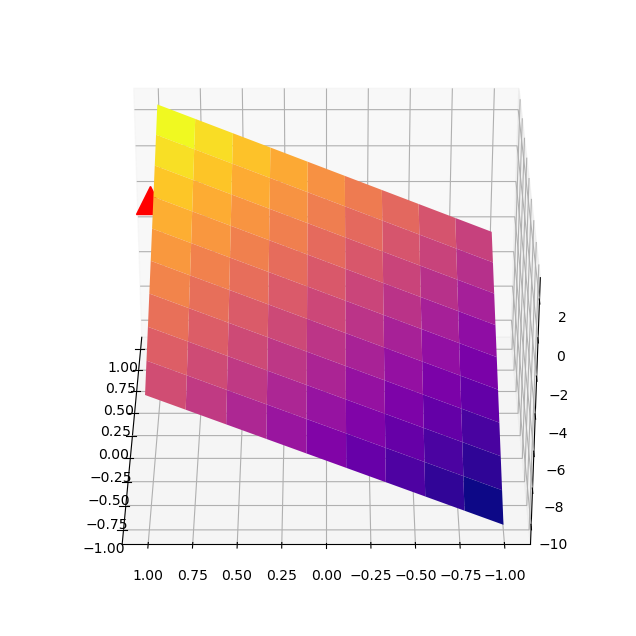

In [37]:
#classificando um ponto X qualquer 
X = torch.Tensor([0,1,2]) #ponto de analise para classificação
y = perceptron(X)

classificado =  y.data.numpy()[0]
print('O valor classificado pelo perceptron foi {}'.format(classificado))

#Plotando esse ponto no grafico
plot3d(perceptron)
plt.plot([X[0]],[X[1]],[X[2]],marker='^',markersize=20,color='r')

# Funções de Ativação

In [38]:
import torch
from torch import nn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

-2.8


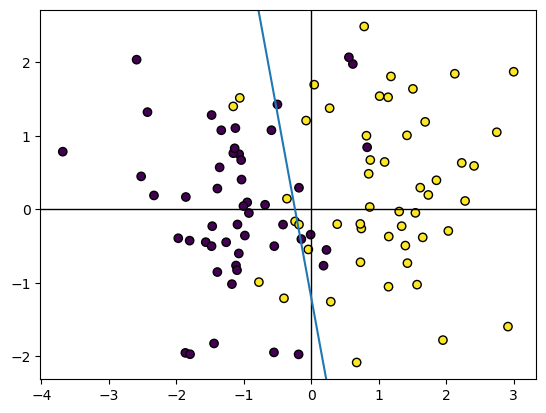

In [39]:
np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  
w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

In [40]:
perceptron = nn.Linear(in_features=2, out_features=1) #instanciando o perceptron
# activation = nn.Sigmoid() #selecionando a ativacao nao linear
activation = nn.ReLU()
# activation = nn.Tanh()

print(perceptron.weight.data)
print(perceptron.bias.data)

#forçando os pesos a serem o valor que queremos
perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias   = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[-0.1549,  0.1427]])
tensor([-0.3443])
tensor([[5., 1.]])
tensor([1.2000])


tensor([-3.6835,  0.7848])
tensor([-0.1461, -0.4050])
tensor([-0.5009,  1.4280])
tensor([3.0020, 1.8728])


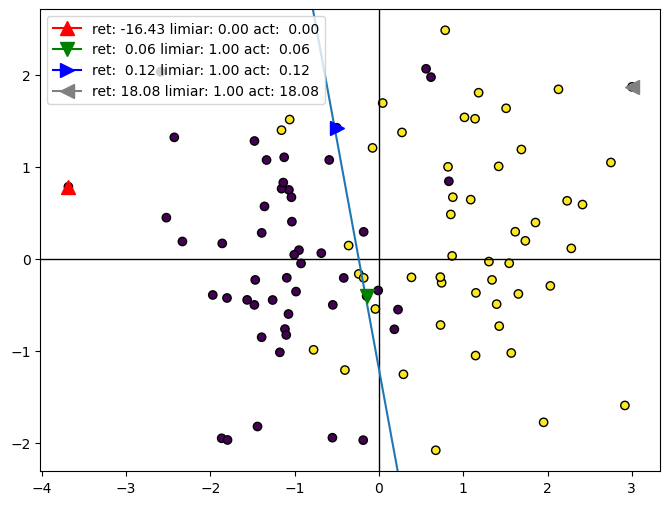

In [41]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
    x = torch.Tensor(X[idx])
    print(x)
  
    ret = perceptron(x)
    act = activation(ret) #activation = nn.Sigmoid()
    
  
    act_limiar = 0 if ret.data < 0 else 1
  
    label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
  
plt.legend()
plt.show()

In [42]:
# perceptron = nn.Linear()
# activation = nn.Sigmoid()

# ret = perceptron(X(w1,w2))
# act = activation(ret)

# print(act)